In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mt

#### REading dataset

In [78]:
data=pd.read_csv('NLP DATASET.csv',error_bad_lines=False)
data.head()


b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [67]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

#### code to check all the missing values in my dataset (Data cleaning)

In [68]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [69]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [70]:
data.dropna(inplace=True)

In [71]:
data.isnull().sum()

password    0
strength    0
dtype: int64

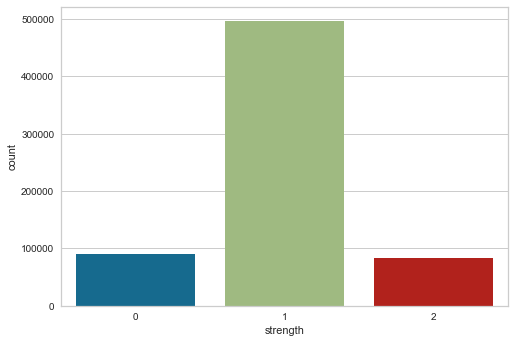

In [72]:
sns.countplot(data['strength'])

In [64]:
password_tuple=np.array(data)

In [65]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['joroce675', 1],
       ['kinyxyh382', 1],
       ['AbpuybTc4NQ7Xzd3', 2]], dtype=object)

#### shuffling randomly for robustness and to avoid data imbalance

In [11]:
import random
random.shuffle(password_tuple)

In [12]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]


In [13]:
x

['kzde5577',
 'kzde5577',
 'kino3434',
 'megzy123',
 'visi7k1yr',
 'kzde5577',
 'u6c8vhow',
 'v1118714',
 'kzde5577',
 'universe2908',
 'megzy123',
 'universe2908',
 'AVYq1lDE4MgAZfNt',
 'WUt9IZzE0OQ7PkNE',
 'kzde5577',
 'g067057895',
 'AVYq1lDE4MgAZfNt',
 'kzde5577',
 'idofo673',
 'visi7k1yr',
 'jytifok873',
 'megzy123',
 '612035180tok',
 'universe2908',
 'jerusalem393',
 'universe2908',
 'sbl571017',
 'lamborghin1',
 'jytifok873',
 'megzy123',
 'prisonbreak1',
 'u6c8vhow',
 'faranumar91',
 'go7kew7a2po',
 'gaymaids1',
 'kino3434',
 'asgaliu11',
 'fk9qi21m',
 'fk9qi21m',
 'jerusalem393',
 '52558000aaa',
 'fahad123',
 'WUt9IZzE0OQ7PkNE',
 'czuodhj972',
 'lsdlsd1',
 'faranumar91',
 'faranumar91',
 '52558000aaa',
 'a2531106',
 'cigicigi123',
 'idofo673',
 '6975038lp',
 'olmaz.',
 'c3h8bkzr',
 'faranumar91',
 'hpqkoxsn5',
 'olmaz.',
 'prisonbreak1',
 'olmaz.',
 'klara-tershina3H',
 'lsdlsd1',
 'as326159',
 'matiofox08',
 'TyWM72UNEex8Q8Y',
 'sknq7m0',
 'yqugu927',
 'schalke04',
 'patri197

#### create a custom function to split input into characters of list

In [14]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [15]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

#### import TF-IDF vectorizer to convert String data into numerical data

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

#### apply TF-IDF vectorizer on data

In [18]:
X=vectorizer.fit_transform(x)

In [19]:
X.shape

(669639, 131)

In [20]:
vectorizer.get_feature_names()

['\x05',
 '\x08',
 '\x0f',
 '\x10',
 '\x11',
 '\x13',
 '\x16',
 '\x17',
 '\x18',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¤',
 '¦',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '¼',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'ê',
 'í',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '‚',
 '‹',
 '›']

In [21]:
first_document_vector=X[0]
first_document_vector

<1x131 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [22]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56667573],
        [0.        ],
        [0.59173102],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [23]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591731
5,0.566676
z,0.336162
k,0.291993
d,0.285454
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


#### split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

In [26]:
X_train.shape

(502229, 131)

In [27]:
from sklearn.linear_model import LogisticRegression

#### Apply Logistic on data as use-cas is Classification

In [28]:
clf=LogisticRegression(random_state=0,multi_class='multinomial',n_jobs=5)

In [29]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', n_jobs=5, random_state=0)

#### doing prediction for specific custom data

In [30]:
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([1])

#### doing prediction on X-Test data

In [31]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 2, ..., 1, 1, 1])

#### check Accuracy of your model using confusion_matrix,accuracy_score

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [33]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("The accuracy is =",accuracy_score(y_test,y_pred))

[[  6524  16185     17]
 [  4741 116113   3182]
 [    57   6365  14226]]
The accuracy is = 0.8175318081357147


##### create report of your model

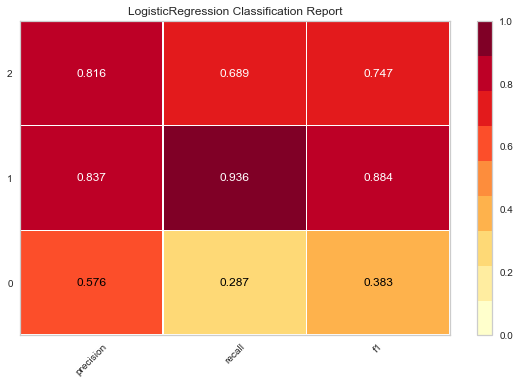

In [34]:
from sklearn.metrics import classification_report
from yellowbrick.classifier import *
visualize=ClassificationReport(clf)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)    


In [47]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5,random_state=1)
forest.fit(X_train, y_train)

y_pred=forest.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model

# fit the model 
forest.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [44]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))


Random forest: Accuracy on training Data: 0.768
Random forest: Accuracy on test Data: 0.766


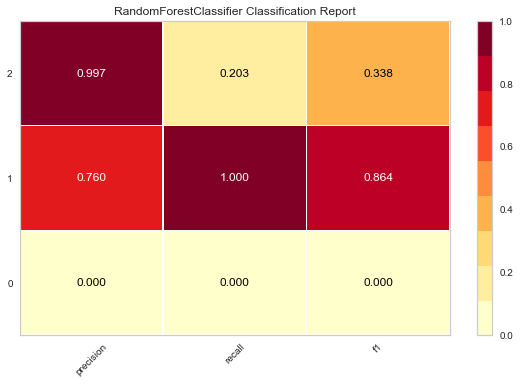

In [45]:
from yellowbrick.classifier import *
visualize=ClassificationReport(forest)
visualize.fit(X_train,y_train)
visualize.score(X_test,y_test)
visualize.show(clear_figure=True)

## Decision tree

In [73]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [76]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [77]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

NameError: name 'y_train_tree' is not defined